# **Quantum Coin Game**

---



### **Table of Contents**
---

1. [Introduction](#introduction)<br>
   1.1 [What is Quantum Coin Game](#quantum_definition)<br>
   1.2 [Concept](#concept)<br>
   1.3 [Idea](#idea)<br>
   1.4 [Rules of the Game](#rules)<br>
2. [Analogy](#analogy)<br>
3. [Approach](#approach)<br>
4. [General Strategy](#general_strategy)<br>
5. [Play it with Qiskit](#play_it)<br>
   5.1 [Measurement](#measurement)<br>
   5.2 [QASM Simulator](#qasm_simulator)<br>
   5.3 [Who Wins?](#who_wins)<br>
6. [How Quantum Computer can win most of the time?](#quantum_mind)<br>
   6.1 [Approach](#quantum_approach)<br>
   6.2 [Play it with Qiskit](#quantum_play)<br>
   6.3 [Measurement](#quantum_measurement)<br>
   6.4 [QASM Simulator](#quantum_qasm)<br>
   6.5 [Who Wins?](#quantum_wins)<br>
7. [Conclusion](#conclusion)<br>
8. [References](#references)<br>
9. [Quick Exercise](#quick_exercise)<br>
10.[Version Information](#version_information)

### **Introduction** <a id="introduction"></a>

---


### What is Quantum Coin Game ? <a id="quantum_definition"></a>
> Quantum Coin Game is one of the fundamental concept of quantum computing, which uses simple implementation of quantum gates or more precisely uses the wierdness of quantum mechanics, to win about 97% of the time, when played against an opponent. Flipping of coin and say heads or tails.

### Where the concept came from ? <a id="concept"></a>
> The concept of Quantum Coin Game came from the idea of classical coin game which can only show heads and tails. But since the game utilizes the concepts of quantum mechanics, it would be interesting to see what could be the outcome of the whole experiment.

### What is the main idea of this game ? <a id="idea"></a>
> The main concept of this game is how the quantum computer uses the power of **QUANTUM SUPERPOSITION**, which tells an object can exists in 2 different states at the same time, to win absolutely everytime. The fact is an quantum computer can do superposition already puts it in a higher chance of winning over the classical flip.
> > **NOTE**:To learn more about quantum superposition, link to "[Qiskit Textbook](https://qiskit.org/textbook/ch-states/representing-qubit-states.html)" superposition page.

### What are the rules of this game ? <a id="rules"></a>
> 1. **Quantum Computer** plays a move but it is not revealed to the **Opponent(Human)**.
> 2. **Opponent(Human)** plays a move and it is also not revealed to the **Quantum Computer**.
> 3. Finally **Quantum Computer** plays a move.
> 4. Results are shown. If its heads, then **Quantum Computer** wins. Else, **Opponent(Human)** wins.
> **NOTE**:- "Playing a move" refers to "**Flipping the coin**".

**NOTE**: We consider the coin as '**FAIR COIN**'



---




### **Analogy** <a id="analogy"></a>

---

Now that we know what is a quantum coin game, what is it based on and most importantly what are the rules of this game, lets convert the concept of this game in quantum computing terminology.

* The 'coin' in flipping a coin we referring here is a '**single qubit gate**'.
$$
      |\psi\rangle=\begin{bmatrix}\alpha \\ \beta\end{bmatrix}
$$

  where $\alpha, \beta \in \mathbb{C}$ and $|\alpha|^2 + |\beta|^2 = 1$


* "**Flipping**" the coin is application of the **bit-flip operator**

$$
  X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

* The "**heads**" state is defined as 
$$
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$ and "**tails**" as 
$$
|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

* The quantum computer "plays" by applying the Hadamard $H$ operator 
$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 & 1 \\ 1 & -1 \end{bmatrix}
$$


### **Approach** <a id="approach"></a>

---
Lets see how to approach the game in quantum computing terminology-

* The coin is initialized to the $|0\rangle$ "heads" state.

* The computer plays, applying the Hadamard $H$ operator to the coin (operators are applied using matrix multiplication). 
$$
H|0\rangle = \frac{1}{\sqrt2}(|0\rangle + |1\rangle)
$$
The coin enters the 
$$
H|0\rangle = |+\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 \\ 1 \end{bmatrix}
$$
state.


* The human plays, choosing whether to flip the coin (apply the $X$ operator). However, since the $X$ operator just flips the state vector upside down, $X$ has no effect 
$$
X|+⟩=|+⟩. 
$$
No matter what, the state is $|+⟩$ after the human plays.

* The computer plays, applying the Hadamard $H$ operator again, taking the coin to the $|0⟩$ "heads" state.
$$
H|+\rangle = |0\rangle
$$

### **General Strategy** <a id="general_strategy"></a>

---
Now that we have developed some analogy with the quantum computing terms and approach to take the rules, lets develop the approach using python.

Let me play as a *Human opponent*, since I am not a being of quantum realm.

Before starting the game, lets maintain a dictionary of what are the possible moves a quantum computer can take-


```python
quantum_moves = {'Identity': 'I',
                'X': 'X',
                'Hadamard': 'H'
                }
```
and what are the possible moves a classical opponent can take-

```python
classical_moves = {'Identity': 'I',
                  'X': 'X'
                  }
```

Now lets see what are the *possible combination* we can take of these moves-


Start State  | Quantum  | Classical  | Quantum  | Result          | Who wins?
-------------|----------|------------|----------|-----------------|-----------
$|0\rangle$  | $H$      | $I$        | $H$      | $|0\rangle$     | Quantum
$|0\rangle$  | $H$      | $X$        | $H$      | $|0\rangle$     | Quantum
$|0\rangle$  | $H$      | $I$        | $I$      | $|0\rangle$ + $|1\rangle$ | Either Quantum or Classical
$|0\rangle$  | $H$      | $I$        | $H$      | $|0\rangle$ + $|1\rangle$ | Either Quantum or Classical
$|0\rangle$  | $H$      | $I$        | $H$      | $|0\rangle$ + $|1\rangle$ | Either Quantum or Classical
$|0\rangle$  | $H$      | $I$        | $H$      | $|0\rangle$ + $|1\rangle$ | Either Quantum or Classical
-------------|----------|------------|----------|----------------|---------------------------
$|0\rangle$  | $I$      | $I$        | $I$      | $|0\rangle$ | Quantum
$|0\rangle$  | $I$      | $X$        | $I$      | $|1\rangle$ | Classical
$|0\rangle$  | $I$      | $I$        | $H$      | $|0\rangle$ + $|1\rangle$ | Either Quantum or Classical
$|0\rangle$  | $I$      | $X$        | $H$      | $|0\rangle$ - $|1\rangle$ | Either Quantum or Classical
$|0\rangle$  | $I$      | $I$        | $X$      | $|1\rangle$ | Classical
$|0\rangle$  | $I$      | $X$        | $X$      | $|0\rangle$ | Quantum
-------------|----------|------------|----------|-------------|---------------------------
$|0\rangle$  | $X$      | $I$        | $X$      | $|0\rangle$ | Quantum
$|0\rangle$  | $X$      | $X$        | $X$      | $|1\rangle$ | Classical
$|0\rangle$  | $X$      | $I$        | $H$      | $|0\rangle$ - $|1\rangle$ | Either Quantum or Classical
$|0\rangle$  | $X$      | $X$        | $H$      | $|0\rangle$ + $|1\rangle$| Either Quantum or Classical
$|0\rangle$  | $X$      | $I$        | $I$      | $|1\rangle$ | Classical
$|0\rangle$  | $X$      | $X$        | $I$      | $|0\rangle$ | Quantum


Now lets see all the possibility-

1. Quantum Computer Wins ( $|0\rangle$ ):

$$
  \frac{6}{18} = 33.33 \%
$$

2. Classical Human Wins ( $|1\rangle$ ):

$$
  \frac{4}{18} = 22.22 \%
$$

3. Either Quantum Computer or Classical Human Wins ( $|0\rangle + |1\rangle$ ):

$$
  \frac{6}{18} = 44.44 \%
$$



 

### **Lets play it using Qiskit** <a id="play_it"></a>

---
Now lets see what happens if the quantum computer **plays in a general appraoch**.


In [225]:
# Importing all the necessary library

import random
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
import qiskit.tools.jupyter
from qiskit_textbook.widgets import plot_bloch_vector_spherical
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_state_qsphere

In [226]:
# Building the initial circuit

def initial_circuit():
    circuit = QuantumRegister(1, 'circuit')
    measure = ClassicalRegister(1, 'result')
    qc = QuantumCircuit(circuit, measure)
    qc.draw('mpl')
    return qc, circuit, measure

In [227]:
# Defining all the possible moves in a dictionary

# Possible moves for the Quantum Computer
quantum_moves = {'Identity': 'I',
                'X': 'X',
                'Hadamard': 'H'
                }

# Possible moves for the Classical Human
classical_moves = {'Identity': 'I',
                  'X': 'X'
                  }

################################################

# Getting random values from respective dictionary based on mode 

def random_moves(mode: str): # mode = quantum or classical
    if mode == 'quantum':
        return quantum_moves[random.choice(list(quantum_moves.keys()))]
    if mode == 'classical':
        return classical_moves[random.choice(list(classical_moves.keys()))]

################################################

# Getting the corresponding gate from distionary as per value

def corresponding_gate(qc, circuit, gate_name):
    if gate_name == 'H':
        qc.h(circuit[0])
    if gate_name == 'X':
        qc.x(circuit[0])
    if gate_name == 'I':
        qc.i(circuit[0])
    return qc

#### Building the initial circuit

In [228]:
qc, circuit, measure = initial_circuit()

#### **Turn 1. Quantum Computer**

Qauntum Computer randomly selects a moves from its dictionary and add the corresponding gates to the circuit.

In [229]:
result_quantum = random_moves('quantum')

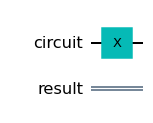

In [230]:
qc = corresponding_gate(qc, circuit, result_quantum)
qc.draw('mpl')

#### **Turn 2. Classical Human**

Classical Human randomly selects a moves from its dictionary and add the corresponding gates to the circuit.

In [231]:
result_classical = random_moves('classical')

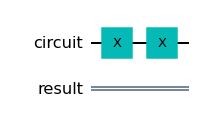

In [232]:
qc = corresponding_gate(qc, circuit, result_classical)
qc.draw('mpl')

#### **Turn 3. Quantum Computer**

Quantum Computer randomly selects a moves from its dictionary and add the corresponding gates to the circuit.

In [233]:
result_quantum_again = random_moves('quantum')

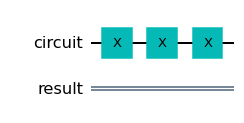

In [234]:
qc = corresponding_gate(qc, circuit, result_quantum)
qc.draw('mpl')

#### **Measurement** <a id="measurement"></a>

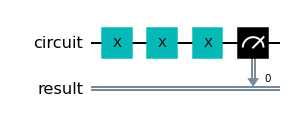

In [235]:
qc.measure(circuit, measure)
qc.draw('mpl')

#### **QASM_Simulator** <a id="qasm_simulator"></a>

{'1': 8192}


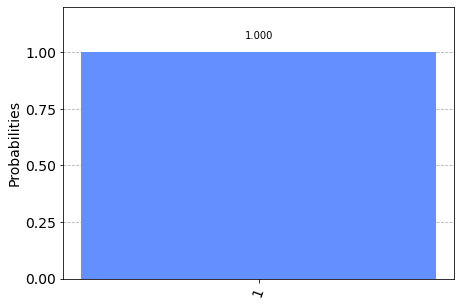

In [236]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
res_count = job.result().get_counts()
print(res_count)
plot_histogram(res_count)

#### **Lets see who wins** <a id="who_wins"></a>

In [237]:
if len(res_count) == 1 and list(res_count.keys())[0] == '0':
    print("Quantum Computer Wins")
if len(res_count) == 1 and list(res_count.keys())[0] == '1':
    print("Classical Human Wins")
if len(res_count) == 2:
    print("Either Quantum Computer or Classical Human Wins")

Classical Human Wins


---
---

### **What if the Quantum Computer plays the game with a mind of its own ?**
#### Another way around to ask this is
### **What can the Quantum Computer do, so that it wins most of the time (~97%) ?** <a id="quantum_mind"></a>

### **Approach** <a id="quantum_approach"></a>

What the quantum computer can do-
1. It places the state of the coin in **superposition** by using $H$ gate.
2. Whatever the classical human plays, $X$ or $I$ will keep the state in **superposition**
3. Lastly, the quantum computer can again use $H$ to snap it in the initial state.

Using the above approach the possibility table reduces to-


Start State  | Quantum  | Classical  | Quantum  | Result          | Who wins?
-------------|----------|------------|----------|-----------------|-----------
$|0\rangle$  | $H$      | $I$        | $H$      | $|0\rangle$     | Quantum
$|0\rangle$  | $H$      | $X$        | $H$      | $|0\rangle$     | Quantum

Now lets look at the possibilities-


1. Quantum Computer Wins ( $|0\rangle$ ):

$$
\frac{2}{2} = 100 \%
$$

2. Classical Human Wins ( $|1\rangle$ ):

$$
  \frac{0}{2} = 0 \%
$$

3. Either Quantum Computer or Classical Human Wins ( $|0\rangle + |1\rangle$ ):

$$
  \frac{0}{2} = 0 \%
$$

This table shows the quantum computer wins $100\%$ of the time. But actually it is $~97\%$, due to certain error.

### **Lets play this version using Qiskit** <a id="quantum_play"></a>

#### Building the initial circuit

In [238]:
qc_version, circuit_version, measure_version = initial_circuit()

#### **Turn 1. Quantum Computer**

Quantum Computer uses Hadamard $H$ on its first turn

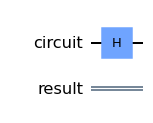

In [239]:
# Use H Gate

qc_version.h(circuit_version[0])
qc_version.draw('mpl')

#### **Turn 2. Classical Human**

Classical Human randomly selects a moves from its dictionary and add the corresponding gates to the circuit.

In [240]:
result_classical_version = random_moves('classical')

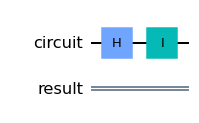

In [241]:
qc_version = corresponding_gate(qc_version, circuit_version, result_classical_version)
qc_version.draw('mpl')

#### **Turn 3. Quantum Computer**

Quantum Computer uses Hadamard $H$ on its first turn

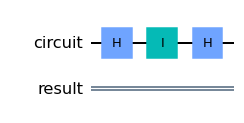

In [242]:
# Used H Gate

qc_version.h(circuit_version[0])
qc_version.draw('mpl')

#### **Measurement** <a id="quantum_measurement"></a>

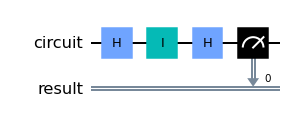

In [243]:
qc_version.measure(circuit_version, measure_version)
qc_version.draw('mpl')

#### **QASM_Simulator** <a id="quantum_qasm"></a>

{'0': 8192}


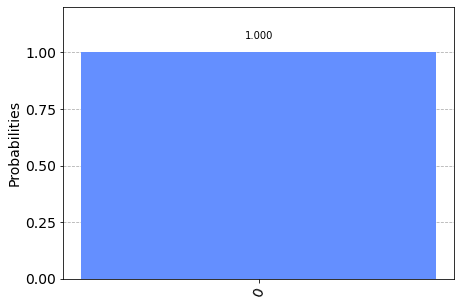

In [244]:
backend_version = Aer.get_backend('qasm_simulator')
job_version = execute(qc_version, backend_version, shots=8192)
res_count_version = job_version.result().get_counts()
print(res_count_version)
plot_histogram(res_count_version)

#### **Lets see who wins** <a id="quantum_wins"></a>

In [245]:
if len(res_count_version) == 1 and list(res_count_version.keys())[0] == '0':
    print("Quantum Computer Wins")
if len(res_count_version) == 1 and list(res_count_version.keys())[0] == '1':
    print("Classical Human Wins")
if len(res_count_version) == 2:
    print("Either Quantum Computer or Classical Human Wins")

Quantum Computer Wins


#### **Quantum Computer Wins all the time.**

---

### **Conclusion** <a id="conclusion"></a>

This simple and yet fun little game shows the basic quantum states $|0\rangle$, $|1\rangle$, $|+\rangle$ and $|−\rangle$, plus the common ways of moving between them with the $X$, $H$, $I$, $Z$ gates. 

### **References** <a id="references"></a>

This notebook is inspired from:

> [1]. [Ted talk by Sohini Ghosh](https://www.ted.com/talks/shohini_ghose_a_beginner_s_guide_to_quantum_computing#t-208006). 

> [2]. Quantum Coin Flipping from [Wikipedia](https://en.wikipedia.org/wiki/Quantum_coin_flipping)

#### **Quick Exercise** <a id="quick_exercise"></a>

The rules of the game we learned so far are the main rules of the game.
But, think of other variations of the game as well, tweak the game a little could result in significant change in answer. Such as-

1. What if, instead of quantum computer taking first turn, the classical human take the first turn ?
2. What if, instead of representing head as $|0\rangle$, the tail is represented as $|0\rangle$ ?
3. What if, instead of using fair coin, we used unfair coin ?
4. What if, instead of playing against a classical human, the quantum computer plays with another quantum computer ?
5. What if, instead of having 3 turns, there are $n$ number of turns ?
6. What if, instead of using all gates, restrict the use of some gates ?

and many more variations are possible.

### **Version Information** <a id="version_information"></a>

In [246]:
%qiskit_version_table

Qiskit Software,Version
qiskit-terra,0.18.1
qiskit-aer,0.8.2
qiskit-ignis,0.6.0
qiskit-ibmq-provider,0.16.0
qiskit-aqua,0.9.4
qiskit,0.29.0
qiskit-nature,0.1.5
qiskit-finance,0.2.0
qiskit-optimization,0.2.1
qiskit-machine-learning,0.2.0
